In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
from matplotlib import pyplot as plt
from rdkit import rdBase, Chem, DataStructs
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem.AtomPairs import Pairs, Torsions
from rdkit.Chem.Draw import SimilarityMaps

In [99]:
def complex(DIR,save,title):
    mol_total = []
    f_name = []
    for f in os.listdir(DIR):
        print(f)
        f_word = f.split('-')
        f_name.append(f_word[0]) # code name with structure number +'-'+f_word[1]
        suppl = Chem.SDMolSupplier(DIR+f)
        mols = [x for x in suppl if x is not None]
        mol_total.append(mols[0])
    morgan_fps = [AllChem.GetMorganFingerprint(mol,2) for mol in mol_total] 
    # morgan_fps = [AllChem.GetMorganFingerprintAsBitVect(mol,radius=2,nBits=256,useChirality=True) for mol in mol_total] 
    # morgan_fps =[ Chem.RDKFingerprint(mol) for mol in mol_total] # rdkfingerprint
    # morgan_fps = [AllChem.GetMACCSKeysFingerprint(mol) for mol in mol_total]
    morgan_total = []
    for i in range(len(mol_total)):
        morgan = DataStructs.BulkTanimotoSimilarity(morgan_fps[i], morgan_fps[0:])
        morgan_total.append(morgan)
    morgan_total = np.array(morgan_total)

    np.savetxt(OUT + save[0] ,morgan_total,delimiter=',') # 保存相似度
    
    fig = plt.figure(figsize=(8,6)) # 24,18
    ax = fig.add_subplot(111)
    score=morgan_total # Score function
    # name=np.arange(len(mol_total))
    # col=np.arange(len(mol_total))
    im=plt.imshow(score, cmap='Blues') 
    ax.xaxis.set_ticks_position('top')
    ax.set_xticks(range(len(mol_total)),f_name) 
    ax.set_yticks(range(len(mol_total)),f_name)

    rows, cols = np.indices(score.shape)
    for y, x in zip(rows.flat, cols.flat):
        plt.annotate(f'{score[y, x]:.2f}', xy=(x, y),
                    xytext=(0, 0), textcoords='offset points',
                    ha='center', va='center', fontsize=9)

    plt.tick_params(axis='x',colors='black')
    plt.tick_params(axis='y',colors='black')
    plt.xticks(rotation=30)
    cb = fig.colorbar(im,pad=0.03)
    # cb.set_label('ee%',fontsize=16)
    # cb.set_ticks(np.arange(0,1.2,0.2))
    # cb.set_ticklabels(('0', '0.2', '0.4', '0.6', '0.8', '1'))
    ax.set_title(title,fontsize=16, fontweight='bold', ha='center', va='center')
    plt.savefig(OUT + save[1], dpi = 300)
    # plt.show()

def score(file):
    data = pd.read_csv(file,header=None)
    data = np.array(data)
    score = (np.sum(data)-len(data))/(len(data)**2-len(data)) # 需要确认一下这个是怎么算的
    return score

CsF.sdf
Et3N.sdf
K3PO4.sdf
KOH.sdf
LiOtBu.sdf
NaHCO3.sdf
NaOH.sdf


[16:38:30] Warning: molecule is tagged as 3D, but all Z coords are zero
[16:38:30] Warning: molecule is tagged as 3D, but all Z coords are zero
[16:38:30] Warning: molecule is tagged as 3D, but all Z coords are zero
[16:38:30] Warning: molecule is tagged as 3D, but all Z coords are zero


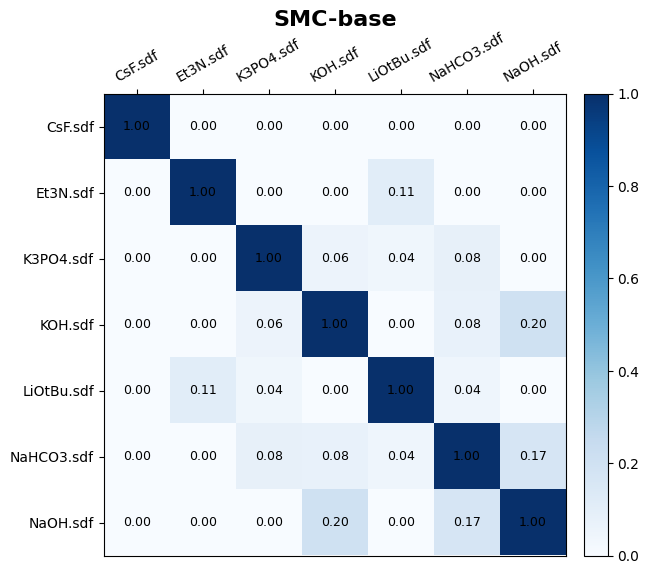

In [100]:
OUT = './test_similarity/'
titles = ['BHA',
          'SMC',
          'ANSA']


complex('./molecule sdf/SMC/base/',
        ['SMC_MFP/base.csv','SMC_MFP/base.png'],
        'SMC-base')

In [81]:
# Similarity of BHA
score_total = []
score_1 = score(OUT + 'BHA/additive.csv')
score_total.append(score_1)
score_2 = score(OUT + 'BHA/aryl halide.csv')
score_total.append(score_2)
score_3 = score(OUT + 'BHA/ligand.csv')
score_total.append(score_3)
score_4 = score(OUT + 'BHA/base.csv')
score_total.append(score_4)

print(score_total)

[0.5870035451577266, 0.47716107542588704, 0.6284858837862174, 0.3845046082949309]


In [101]:
# similarity of SMC
score_total = []
score_1 = score(OUT + 'SMC_MFP/aryl halide.csv')
score_total.append(score_1)
score_2 = score(OUT + 'SMC_MFP/boronic acid.csv')
score_total.append(score_2)
score_3 = score(OUT + 'SMC_MFP/base.csv')
score_total.append(score_3)
score_4 = score(OUT + 'SMC_MFP/ligand.csv')
score_total.append(score_4)
score_5 = score(OUT + 'SMC_MFP/solvent.csv')
score_total.append(score_5)

print(score_total)

[0.32005071996522844, 0.5648468731698623, 0.036451462041524184, 0.14202333231871497, 0.047889610389610336]


In [93]:
# Similarity of ANSA
score_total = []
score_1 = score(OUT + 'ANSA_MFP1024/imine.csv')
score_total.append(score_1)
score_2 = score(OUT + 'ANSA_MFP1024/mercaptan.csv')
score_total.append(score_2)
score_3 = score(OUT + 'ANSA_MFP1024/catalyst.csv')
score_total.append(score_3)

print(score_total)

[0.5430493872737208, 0.14147647966069013, 0.4467026353031295]
